In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('hospital_data.csv')

In [12]:
df

,id,date,deaths,understaffed,days_vent_supplies_available,days_masks_available,days_eye_protection_available,days_gowns_available,days_gloves_available,masks_units_available,...,gloves_units_available,total_ventilators,total_beds,total_icu_beds,occupied_ventilators,occupied_icu_beds,occupied_inpatient_beds,covid_ventilator_patients,covid_icu_patients,covid_patients
0,14268115,2020-04-09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,53.0,17.0,0.0,2.0,24.0,0.0,NaN,0.0
1,14268115,2020-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,17.0,1.0,3.0,NaN,NaN,NaN,NaN
2,14268115,2020-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,17.0,2.0,4.0,NaN,NaN,NaN,NaN
3,14268115,2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,17.0,2.0,4.0,NaN,NaN,NaN,NaN
4,14268115,2020-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,17.0,2.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118250,68799541,2020-07-30,0.0,[false],NaN,[31+],[7-14],[1-3],[31+],4300.0,...,1544.0,10.0,44.0,12.0,0.0,0.0,32.0,0.0,0.0,0.0
118251,65531605,2020-05-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44.0,89.0,30.0,0.0,0.0,19.0,0.0,NaN,0.0
118252,65531605,2020-07-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,44.0,89.0,30.0,0.0,1.0,14.0,0.0,NaN,0.0
118253,50899718,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,109.0,12.0,1.0,0.0,40.0,0.0,0.0,0.0


In [15]:
df.dtypes

id                                         int64
date                              datetime64[ns]
deaths                                   float64
understaffed                              object
days_vent_supplies_available              object
days_masks_available                      object
days_eye_protection_available             object
days_gowns_available                      object
days_gloves_available                     object
masks_units_available                    float64
eye_protection_units_available           float64
gowns_units_available                    float64
gloves_units_available                   float64
total_ventilators                        float64
total_beds                               float64
total_icu_beds                           float64
occupied_ventilators                     float64
occupied_icu_beds                        float64
occupied_inpatient_beds                  float64
covid_ventilator_patients                float64
covid_icu_patients  

In [17]:
df['days_vent_supplies_available'].unique()

array([nan, '[0]', '[7-14]', '[1-3]', '[4-6]', '[15-30]', '[31+]',
       '[15+]', '[4-14]'], dtype=object)

In [14]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [18]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = [x for x in df.columns if x not in numeric_columns]

In [19]:
numeric_columns

['id',
 'deaths',
 'masks_units_available',
 'eye_protection_units_available',
 'gowns_units_available',
 'gloves_units_available',
 'total_ventilators',
 'total_beds',
 'total_icu_beds',
 'occupied_ventilators',
 'occupied_icu_beds',
 'occupied_inpatient_beds',
 'covid_ventilator_patients',
 'covid_icu_patients',
 'covid_patients']

In [20]:
categorical_columns

['date',
 'understaffed',
 'days_vent_supplies_available',
 'days_masks_available',
 'days_eye_protection_available',
 'days_gowns_available',
 'days_gloves_available']

In [25]:
def explore_numeric_column(df, col_name):
    
    print(col_name)
    df[col_name].hist()
    plt.show()
    
def missing_values_pie_chart(data, col):
    print(col)
    df = data.copy()
    df['missing'] = 'Not Missing'
    df.loc[pd.isna(df[col]), 'missing'] = 'Missing'
    
    df['missing'].value_counts().plot.pie(legend=True)

    
    plt.show()

    print(df[col])

id


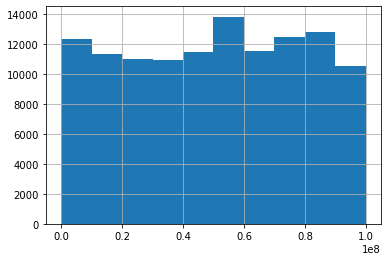

deaths


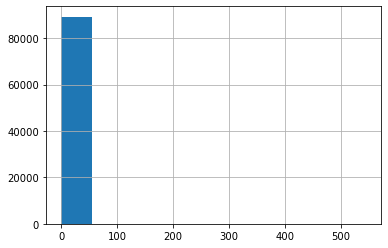

masks_units_available


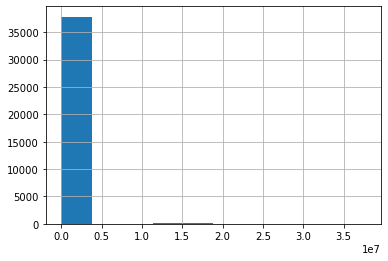

eye_protection_units_available


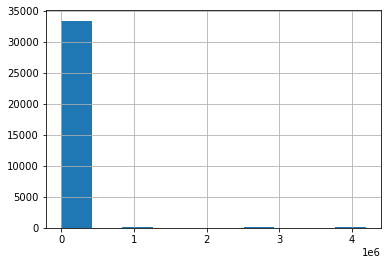

gowns_units_available


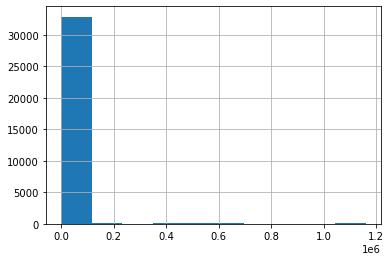

gloves_units_available


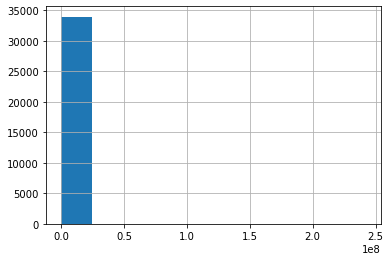

total_ventilators


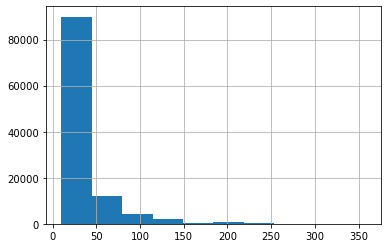

total_beds


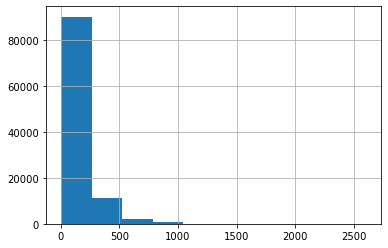

total_icu_beds


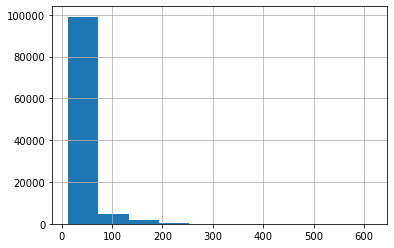

occupied_ventilators


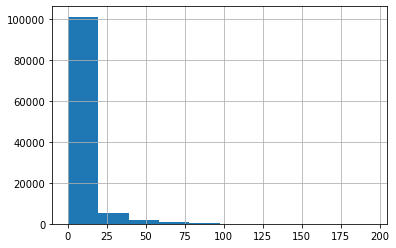

occupied_icu_beds


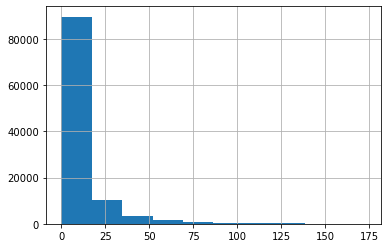

occupied_inpatient_beds


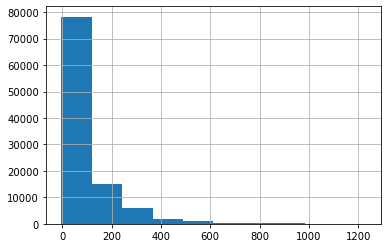

covid_ventilator_patients


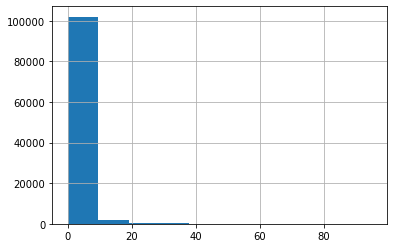

covid_icu_patients


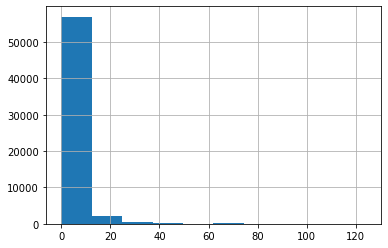

covid_patients


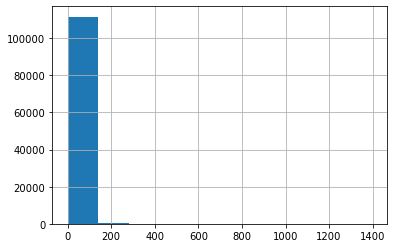

id


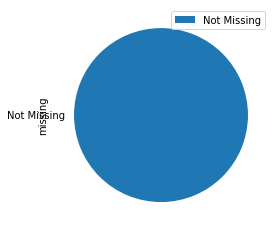

0         14268115
1         14268115
2         14268115
3         14268115
4         14268115
            ...   
118250    68799541
118251    65531605
118252    65531605
118253    50899718
118254    50899718
Name: id, Length: 118255, dtype: int64
date


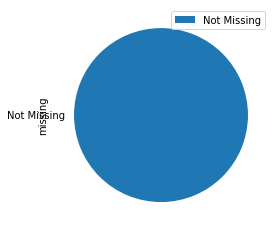

0        2020-04-09
1        2020-05-04
2        2020-05-06
3        2020-05-07
4        2020-05-08
            ...    
118250   2020-07-30
118251   2020-05-22
118252   2020-07-06
118253   2020-07-24
118254   2020-08-09
Name: date, Length: 118255, dtype: datetime64[ns]
deaths


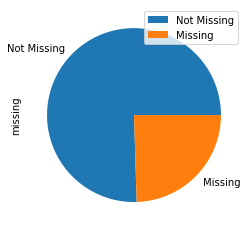

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
118250    0.0
118251    0.0
118252    0.0
118253    NaN
118254    0.0
Name: deaths, Length: 118255, dtype: float64
understaffed


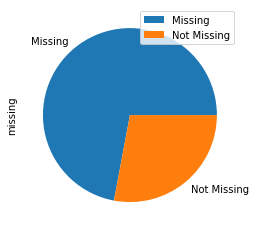

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
118250    [false]
118251        NaN
118252        NaN
118253        NaN
118254     [true]
Name: understaffed, Length: 118255, dtype: object
days_vent_supplies_available


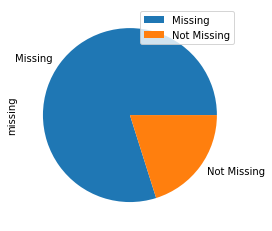

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
118250    NaN
118251    NaN
118252    NaN
118253    NaN
118254    [0]
Name: days_vent_supplies_available, Length: 118255, dtype: object
days_masks_available


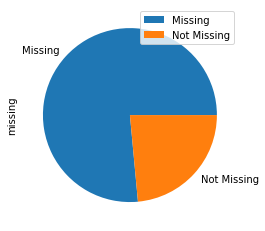

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250    [31+]
118251      NaN
118252      NaN
118253      NaN
118254    [4-6]
Name: days_masks_available, Length: 118255, dtype: object
days_eye_protection_available


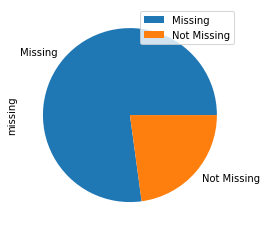

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
118250    [7-14]
118251       NaN
118252       NaN
118253       NaN
118254    [7-14]
Name: days_eye_protection_available, Length: 118255, dtype: object
days_gowns_available


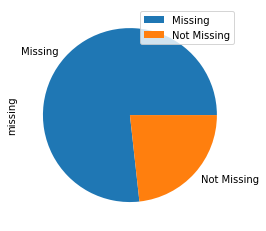

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250    [1-3]
118251      NaN
118252      NaN
118253      NaN
118254    [1-3]
Name: days_gowns_available, Length: 118255, dtype: object
days_gloves_available


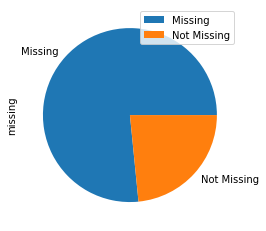

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250    [31+]
118251      NaN
118252      NaN
118253      NaN
118254    [1-3]
Name: days_gloves_available, Length: 118255, dtype: object
masks_units_available


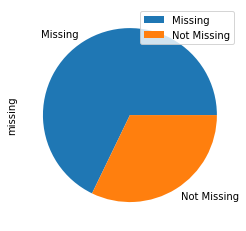

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
118250    4300.0
118251       NaN
118252       NaN
118253       NaN
118254    6180.0
Name: masks_units_available, Length: 118255, dtype: float64
eye_protection_units_available


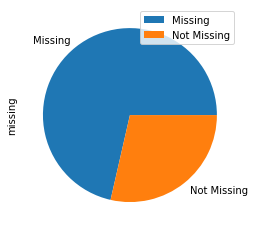

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250     60.0
118251      NaN
118252      NaN
118253      NaN
118254    270.0
Name: eye_protection_units_available, Length: 118255, dtype: float64
gowns_units_available


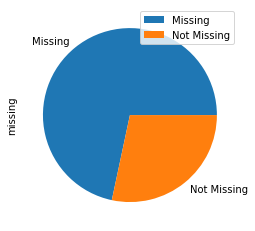

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250     12.0
118251      NaN
118252      NaN
118253      NaN
118254    120.0
Name: gowns_units_available, Length: 118255, dtype: float64
gloves_units_available


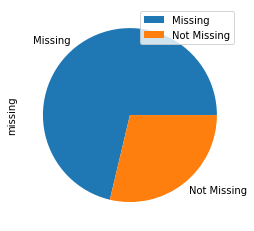

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
118250     1544.0
118251        NaN
118252        NaN
118253        NaN
118254    12949.0
Name: gloves_units_available, Length: 118255, dtype: float64
total_ventilators


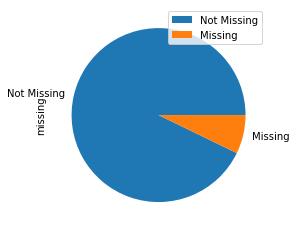

0         12.0
1         13.0
2         13.0
3         13.0
4         13.0
          ... 
118250    10.0
118251    44.0
118252    44.0
118253    16.0
118254    18.0
Name: total_ventilators, Length: 118255, dtype: float64
total_beds


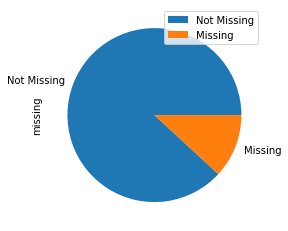

0          53.0
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
118250     44.0
118251     89.0
118252     89.0
118253    109.0
118254    132.0
Name: total_beds, Length: 118255, dtype: float64
total_icu_beds


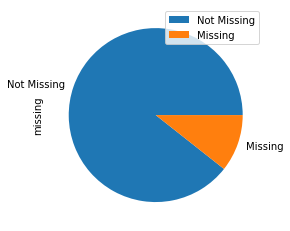

0         17.0
1         17.0
2         17.0
3         17.0
4         17.0
          ... 
118250    12.0
118251    30.0
118252    30.0
118253    12.0
118254    27.0
Name: total_icu_beds, Length: 118255, dtype: float64
occupied_ventilators


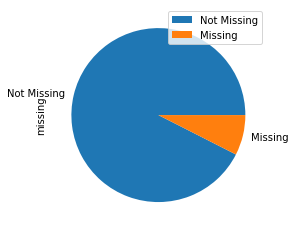

0         0.0
1         1.0
2         2.0
3         2.0
4         2.0
         ... 
118250    0.0
118251    0.0
118252    0.0
118253    1.0
118254    2.0
Name: occupied_ventilators, Length: 118255, dtype: float64
occupied_icu_beds


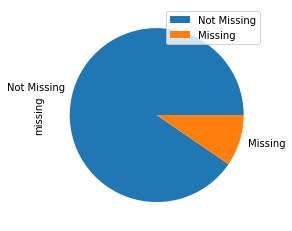

0         2.0
1         3.0
2         4.0
3         4.0
4         3.0
         ... 
118250    0.0
118251    0.0
118252    1.0
118253    0.0
118254    2.0
Name: occupied_icu_beds, Length: 118255, dtype: float64
occupied_inpatient_beds


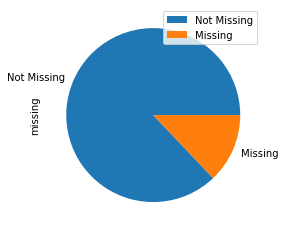

0         24.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
118250    32.0
118251    19.0
118252    14.0
118253    40.0
118254    42.0
Name: occupied_inpatient_beds, Length: 118255, dtype: float64
covid_ventilator_patients


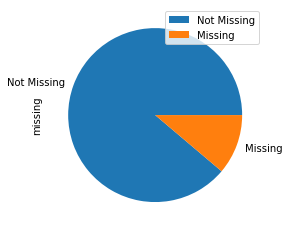

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
118250    0.0
118251    0.0
118252    0.0
118253    0.0
118254    0.0
Name: covid_ventilator_patients, Length: 118255, dtype: float64
covid_icu_patients


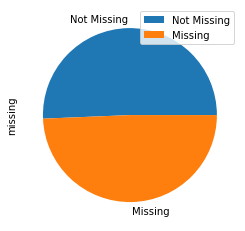

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
118250    0.0
118251    NaN
118252    NaN
118253    0.0
118254    NaN
Name: covid_icu_patients, Length: 118255, dtype: float64
covid_patients


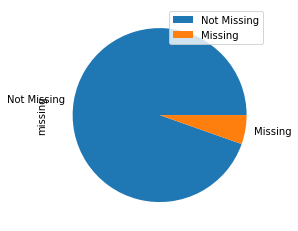

0         0.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
118250    0.0
118251    0.0
118252    0.0
118253    0.0
118254    3.0
Name: covid_patients, Length: 118255, dtype: float64


In [26]:
for i in numeric_columns:
    explore_numeric_column(df, i)
    
for i in df.columns:
    
    missing_values_pie_chart(df, i)
    

In [3]:
corr = df.corr()

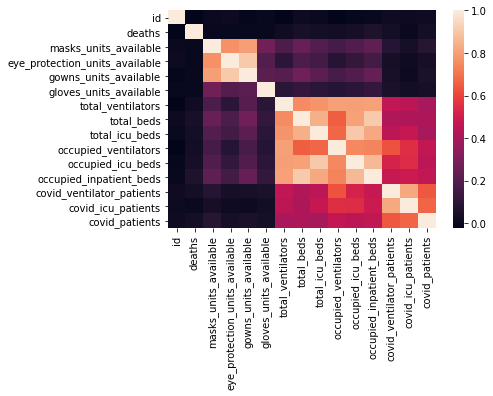

In [4]:
import seaborn as sns

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)